<a href="https://colab.research.google.com/github/FAZIL9922/Customer-segmentation/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
from sklearn.cluster import KMeans

# Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
phoenix = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")


# Creating a DataFrame

In [ ]:
df = pd.DataFrame(phoenix)

# Data Analysis

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape
# If we have low amount of datapoints,
# how can we enlarge the present datapoints to train our model

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* Conclusions

1. No Null Value
2. Gender has the dtype of object, which needs to be taken care of

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Conclusions

1. Avg. age of Customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

<Axes: xlabel='Age', ylabel='count'>

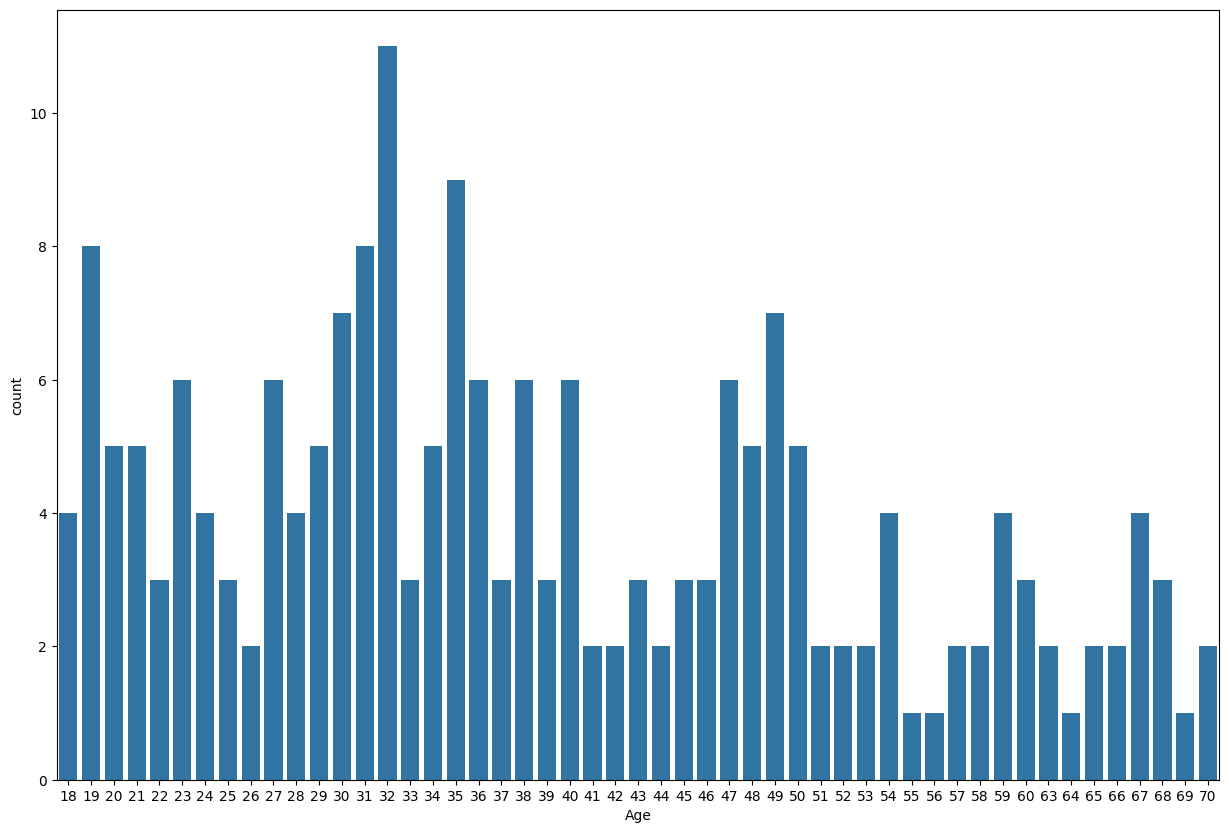

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Age')


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


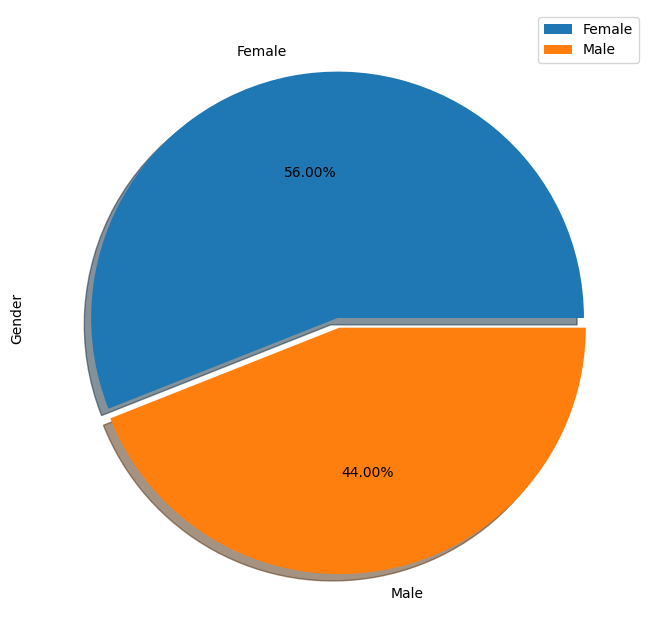

In [ ]:
# Distribution of Gender
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                              explode=(0,0.04))
plt.legend()

* Conclusion

1. No. of females > No. of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

Text(0.5, 1.0, 'Distribution of Annual Income')

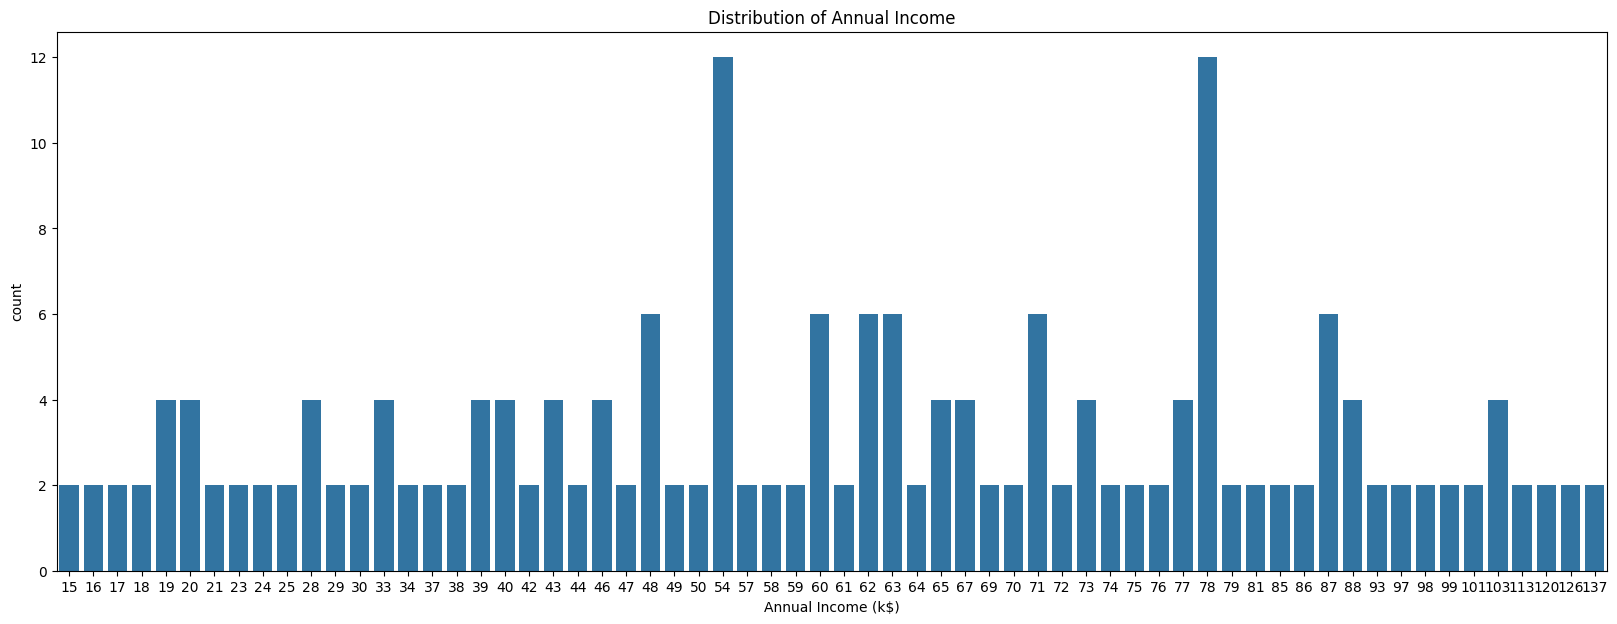

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income')

* Conclusions

1. The customers that are having the salary of $54(k) and $78(K), visits the mall most of time

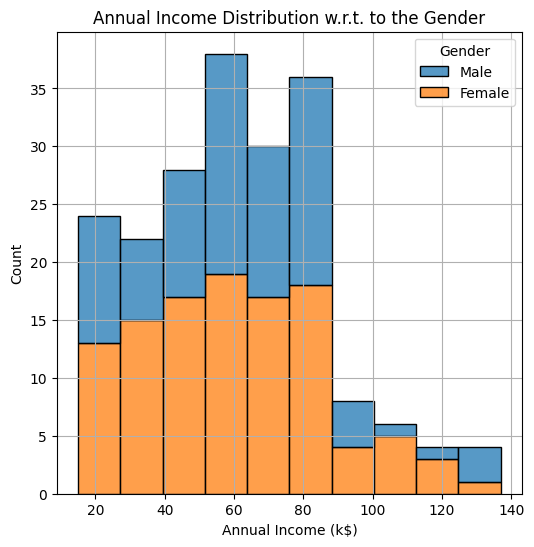

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(df,x='Annual Income (k$)', hue='Gender', multiple='stack')
plt.title('Annual Income Distribution w.r.t. to the Gender')
plt.grid()

* Conclusions:

though the male earns more or the annual income of male is more but still female visits the mall most using two graphs

In [ ]:
#though the male earns more or the annual income
#of male is more but still female visits the mall most using two graphs

# Seaborn lmplot

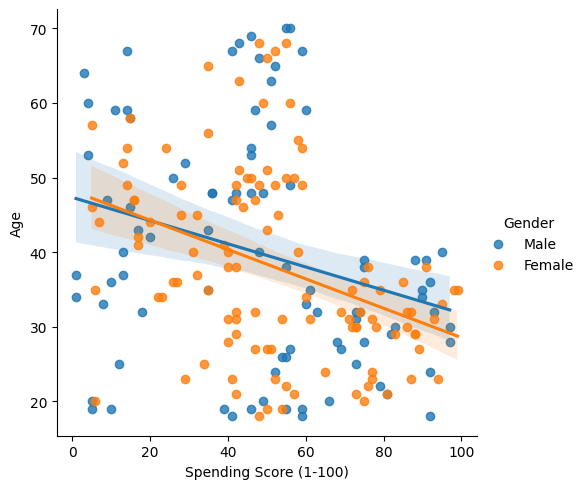

In [ ]:
sns.lmplot(data=df,x='Spending Score (1-100)', y='Age', hue='Gender')

# Machine Learning

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Gender = enc.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.drop('CustomerID', axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
ssd = []
for i in range(1,11):
  Kmodel = KMeans(n_clusters=i, n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

In [ ]:
ssd

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58348.641363315044,
 51130.69008126377,
 44389.80767355766,
 40917.30094289073,
 37646.63443076532]

Text(0.5, 1.0, 'Elbow plot')

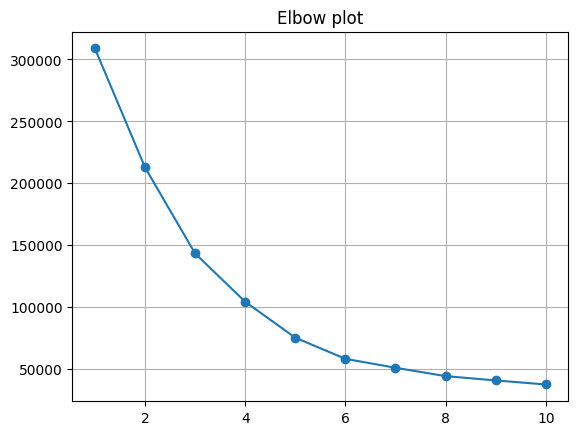

In [ ]:
plt.plot(range(1,11), ssd, marker='o')
plt.grid()
plt.title('Elbow plot')

In [ ]:
# k=6  because after 6 it goes linear

In [ ]:
Kmodel = KMeans(n_clusters=6)

In [ ]:
Kmodel.fit(df)
# Kmodel.fit_predict(df)
# Kmodel.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
prediction = Kmodel.predict(df)

In [ ]:
prediction

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 4, 5,
       0, 3, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5,
       5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
Kmodel.cluster_centers_


array([[ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])

In [ ]:
len(Kmodel.cluster_centers_)


6

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

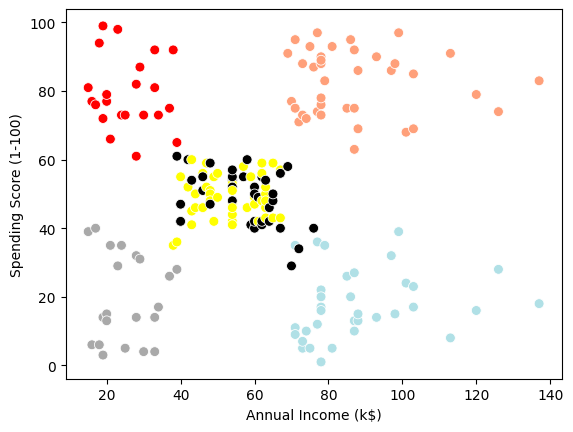

In [ ]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'],
                y = df['Spending Score (1-100)'],
                c=color[Kmodel.labels_],
                s=50)